In [ ]:
'''
This was a super crappy analysis to see if running speed could be treated as binary.
Basically, I trained a linear decoder on a binary and non-binary version of running speed,
and found that decoding was slightly better for the binary version of this variable.
I am pretty sure other groups did a less half-hearted version of this analysis, so maybe start
there is you are looking to make similar claims.
Created by Yoni Browning, August 2018

'''

In [20]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
# sometimes order maters on these
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import oBehave.plotting_stuff as obps
import oBehave.helperfunctions as obhf
import oBehave.neural_analysis as obna
import oBehave.behavior_anaylsis as obba
import sklearn.decomposition as decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR


from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.utilities import get_trace_around_timepoint,get_nearest_frame
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

experiment_id = 639253368



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
manifest = obhf.load_manifest()
obba.includeNovelSession(manifest);
dataset= VisualBehaviorOphysDataset(experiment_id=experiment_id, cache_dir=obhf.drive_path)

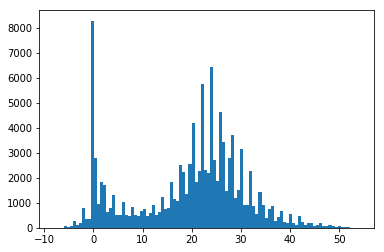

In [25]:
dff = dataset.dff_traces
r = dataset.running_speed.running_speed.values
run = np.interp(dataset.timestamps_ophys,dataset.timestamps_stimulus,r)
plt.hist(run,100);

In [28]:
# compute scores for binary and continuous running linear models
def isRunningBinary(dataset):
    # for continuous running
    dff_train, dff_validate, run_train, run_validate = train_test_split(dff.T, run, train_size=0.5)
    dff_validate, dff_test, run_validate, run_test = train_test_split(dff_validate, run_validate, test_size=0.5)
    lr = LR()
    lr.fit(dff_train,run_train)
    cont_score = lr.score(dff_validate,run_validate)
    # For running w/ split
    dff_train, dff_validate, run_train, run_validate = train_test_split(dff.T, run>10, train_size=0.5)
    dff_validate, dff_test, run_validate, run_test = train_test_split(dff_validate, run_validate, test_size=0.5)
    lr = LR()
    lr.fit(dff_train,run_train)
    binary_score = lr.score(dff_validate,run_validate)
    return cont_score,binary_score

In [32]:
# Run for all experiments.
cont_score = []
binary_score = []
for ii,row in manifest.iterrows():
    c,b = isRunningBinary(VisualBehaviorOphysDataset(experiment_id=row.experiment_id, cache_dir=obhf.drive_path))
    cont_score.append(c)
    binary_score.append(b)
    print('C: '+ str(c) + ' B: '+str(b))
    

C: 0.113309586562 B: 0.125338580402
C: 0.1159355794 B: 0.136937974004
C: 0.11529431669 B: 0.123222154686
C: 0.118055283809 B: 0.126912328155
C: 0.117334536318 B: 0.132794643273
C: 0.122512932894 B: 0.127247544661
C: 0.11671702514 B: 0.128475677751
C: 0.123892672879 B: 0.130021906749
C: 0.122886786787 B: 0.12591778595
C: 0.119397256944 B: 0.126190142465
C: 0.117277184603 B: 0.133167602619
C: 0.119763667471 B: 0.125673070991
C: 0.119368297916 B: 0.127534541782
C: 0.12063928488 B: 0.126916194041
C: 0.115178045696 B: 0.13137803446
C: 0.11590592707 B: 0.132207359089
C: 0.116758819739 B: 0.133267747756
C: 0.117967296546 B: 0.132632678598
C: 0.117750220814 B: 0.133115063232
C: 0.116439679096 B: 0.130994771031
C: 0.120599073121 B: 0.132332498629
C: 0.114147480157 B: 0.133502753794
C: 0.113878761162 B: 0.128223290602
C: 0.121312065318 B: 0.12497813328
C: 0.120078299395 B: 0.128419016344
C: 0.116947648953 B: 0.129110896205
C: 0.11875520179 B: 0.126555584287
C: 0.123878369203 B: 0.127110876359
C: